In [1]:
import numpy as np
import pickle
import scipy
import combo
import os
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def download():
    if not os.path.exists('data/s5-210.csv'):

        if not os.path.exists('data'):
            os.mkdir('data')
        
        with urllib.request.urlopen('http://www.tsudalab.org/files/s5-210.csv') as response, open('data/s5-210.csv', 'wb') as out_file:
            out_file.write(response.read())

In [3]:
def load_data():
    download()
    A =  np.asarray( np.loadtxt('data/s5-210.csv',skiprows=1,delimiter=',') )
    X = A[:,0:3]
    t  = -A[:,3]
    return X, t

In [4]:
# Load the data  
# X is the N x d dimensional matrix. Each row of X denotes the d-dimensional feature vector of search candidate. 
# t is the N-dimensional vector that represents the corresponding negative energy of search candidates. 
# ( It is of course unknown in practice. )
X, t = load_data()
 
# Normalize the mean and standard deviation along the each column of X to 0 and 1, respectively
X = combo.misc.centering( X )

In [5]:
# Declare the class for calling the simulator. 
# In this tutorial, we simply refer to the value of t. 
# If you want to apply combo to other problems, you have to customize this class. 
class simulator:
    def __init__( self ):
        _, self.t = load_data()
    
    def __call__( self, action ):
        return self.t[action]

In [6]:
# Design of policy

# Declaring the policy by 
policy = combo.search.discrete.policy(test_X=X)
# test_X is the set of candidates which is represented by numpy.array.
# Each row vector represents the feature vector of the corresponding candidate

# set the seed parameter 
policy.set_seed( 0 )

In [7]:
# How to use the interactive mode 
simulator = simulator()

''' 1st step (random sampling) '''
actions = policy.random_search(max_num_probes=1, num_search_each_probe=10, simulator=None)
t  = simulator(actions)
policy.write(actions, t)
combo.search.utility.show_search_results(policy.history, 10)

''' 2nd step (random sampling) '''
actions = policy.random_search(max_num_probes=1, num_search_each_probe=10, simulator=None)
t = simulator(actions)
policy.write(actions, t)
combo.search.utility.show_search_results(policy.history, 10)

''' 3rd step (bayesian optimization) '''
actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, 
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
combo.search.utility.show_search_results(policy.history, 10)  # describe search results

predictor = policy.predictor
training = policy.training

actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, 
                                                      predictor=predictor, training=training,
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
combo.search.utility.show_search_results(policy.history, 10)  # describe search results



''' 4-th step (bayesian optimization) '''
actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, 
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
combo.search.utility.show_search_results(policy.history, 10)  # describe search results

predictor = policy.predictor
training = policy.training

actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, 
                                                      predictor=predictor, training=training,
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
combo.search.utility.show_search_results(policy.history, 10)  # describe search results

interactive mode stars ... 
 
0001-th multiple probe search (random) 

current best f(x) = -0.980054 (best action = 4547) 
list of simulation results
f(x)=-1.070602 (action = 15673)
f(x)=-1.009056 (action = 9559)
f(x)=-1.195844 (action = 16927)
f(x)=-0.980054 (action = 4547)
f(x)=-0.992820 (action = 2553)
f(x)=-1.146676 (action = 13144)
f(x)=-1.006255 (action = 10827)
f(x)=-0.999862 (action = 1995)
f(x)=-1.055445 (action = 10763)
f(x)=-1.100970 (action = 16450)


0002-th multiple probe search (random) 

current best f(x) = -0.980054 (best action = 4547) 
list of simulation results
f(x)=-1.208666 (action = 13085)
f(x)=-1.069404 (action = 15133)
f(x)=-1.031642 (action = 1706)
f(x)=-1.016702 (action = 2464)
f(x)=-1.172569 (action = 17812)
f(x)=-1.082219 (action = 16533)
f(x)=-1.025272 (action = 1336)
f(x)=-1.031761 (action = 10076)
f(x)=-0.984972 (action = 8876)
f(x)=-1.107730 (action = 15577)


Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0

In [8]:
with open('predictor.dump', 'wb') as f:
    pickle.dump(policy.predictor, f)
policy.training.save('training.npz')
policy.history.save('history.npz')

In [9]:
''' delete policy'''
del policy

policy = combo.search.discrete.policy(test_X=X)
policy.load('history.npz', 'training.npz', 'predictor.dump')

''' 5-th probe (bayesian optimization) '''
actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, predictor=predictor, 
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
combo.search.utility.show_search_results(policy.history, 10)  # describe search result


Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0-th epochmarginal likelihood 6.78070441562
50-th epochmarginal likelihood -2.47887655713
100-th epochmarginal likelihood -7.59893958954
150-th epochmarginal likelihood -10.2862973812
200-th epochmarginal likelihood -11.66234872
250-th epochmarginal likelihood -12.3548082067
300-th epochmarginal likelihood -12.7040042917
350-th epochmarginal likelihood -12.8870117533
400-th epochmarginal likelihood -12.9921850149
450-th epochmarginal likelihood -13.0619789569
500-th epochmarginal likelihood -13.1160665019
Done

0007-th multiple probe search (EI) 

current best f(x) = -0.959371 (best action = 6568) 
list of simulation results
f(x)=-1.024627 (action = 11963)
f(x)=-1.046521 (action = 15909)
f(x)=-1.031994 (action = 9027)
f(x)=-0.992651 (action = 462)
f(x)=-0.985410 (action = 9139)
f(x)=-0.994784 (action = 7214)
f(x)=-0.970820 (action = 11969)
f(x)=-1.013053 (action = 36)
f(x)=-1.209990 (action = 2

In [10]:
res=policy.history

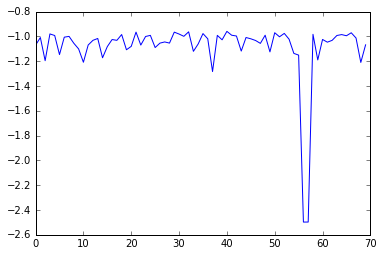

In [11]:
plt.plot(res.fx[0:res.total_num_search])